<a href="https://colab.research.google.com/github/sjdee/Market-Analysis-Techniques/blob/master/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [0]:
# https://www.datacamp.com/community/tutorials/feature-selection-python
# https://www.kaggle.com/dkim1992/feature-selection-ranking

!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '18pa4iuqvz2SX5RYrUdn09bDU8eNm2hqI'

# 2. Load a file by ID 
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('sp500_transformation_input.xlsx')

In [0]:
import pandas as pd

df = pd.read_excel('sp500_transformation_input.xlsx')

In [0]:
deletedDf = df.dropna()
# deletedDf = df.drop(["change_5day","change_10day"], axis=1)

# df_null_removed = df.dropna()

# df_roa_removed = df.drop("RETURN_ON_ASSET", axis=1)

# print(df.describe())

# Process Data

Scale data in features from [0,1]

In [0]:
from sklearn.preprocessing import MinMaxScaler

features = deletedDf.iloc[:,6:-10]
labels = deletedDf.iloc[:,-10:]

# Scaling values in the feature set
scaling = MinMaxScaler(feature_range=(0,1)).fit(features)
features_scaled = pd.DataFrame(scaling.transform(features),columns = features.columns) 
# features_scaled

In [0]:
import numpy as np
np.isnan(features_scaled).any()

PX_VOLUME                    False
PX_OFFICIAL_CLOSE            False
CUR_MKT_CAP                  False
HISTORICAL_MARKET_CAP        False
PE_RATIO                     False
PX_TO_BOOK_RATIO             False
SHORT_INT_RATIO              False
SHORT_INT                    False
RETURN_ON_ASSET              False
TOT_ANALYST_REC              False
TOT_BUY_REC                  False
TOT_SELL_REC                 False
TOT_HOLD_REC                 False
EQY_REC_CONS                 False
BEST_ANALYST_RATING          False
BEST_EPS                     False
BEST_EPS_LO                  False
BEST_EPS_HI                  False
BEST_CAPEX                   False
BEST_CAPEX_LO                False
BEST_CAPEX_HI                False
BEST_EST_LONG_TERM_GROWTH    False
BEST_TARGET_PRICE            False
hold_percent                 False
buy_percent                  False
sell_percent                 False
std_5day                     False
std_10day                    False
change_5day         

# Perform PCA

Check how many components make up for at at least 99% of variance in data (15 in this case)

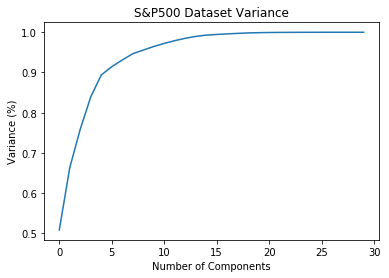

Values for Variance
[0.50843434 0.66349936 0.75920871 0.83941254 0.89378754 0.91430698
 0.93097247 0.94663406 0.95561364 0.9645241  0.97226398 0.97906992
 0.98489688 0.98964435 0.99280958 0.99449914 0.99594374 0.99718532
 0.99830614 0.99895013 0.99937625 0.99960127 0.99973578 0.99986475
 0.99991641 0.99996386 1.         1.         1.         1.        ]


In [0]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA().fit(features_scaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('S&P500 Dataset Variance')
plt.show()

print("Values for Variance")
print(np.cumsum(pca.explained_variance_ratio_))

In [0]:
import pandas as pd

pca = PCA(n_components=15)
dataset = pca.fit_transform(features_scaled)
components = pd.DataFrame(pca.components_,columns=features_scaled.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10','PC-11','PC-12','PC-13','PC-14','PC-15'])


components = round(components,2)
components
components.to_csv("Components.csv")


In [0]:
import pandas as pd
import operator 


df = pd.DataFrame(index=features_scaled.columns,columns=['Occurence','WeightedOccurence','OldWeightedOccurence'])  
df.loc[:,'Occurence']=0
df.loc[:,'WeightedOccurence']=0
df.loc[:,'OldWeightedOccurence']=0

for i in range(6):
  print("for PC",i+1)
  for k in range(30):
    if(abs(pca.components_[i,k])>=0.1):
      print(features_scaled.columns[k])
      df.loc[features_scaled.columns[k],"Occurence"] = df.loc[features_scaled.columns[k],"Occurence"] + 1
      df.loc[features_scaled.columns[k],"WeightedOccurence"] = df.loc[features_scaled.columns[k],"WeightedOccurence"] + 6-i
      df.loc[features_scaled.columns[k],"OldWeightedOccurence"] = df.loc[features_scaled.columns[k],"OldWeightedOccurence"] + i+1
  print()

  
df = df.sort_values(by=['WeightedOccurence', 'Occurence'], ascending=False)   
print(df)
df.to_csv("Feature Contribution.csv")




for PC 1
TOT_BUY_REC
TOT_SELL_REC
TOT_HOLD_REC
EQY_REC_CONS
BEST_ANALYST_RATING
hold_percent
buy_percent
sell_percent

for PC 2
PX_OFFICIAL_CLOSE
CUR_MKT_CAP
HISTORICAL_MARKET_CAP
TOT_ANALYST_REC
TOT_BUY_REC
TOT_SELL_REC
TOT_HOLD_REC
BEST_EPS
BEST_EPS_LO
BEST_EPS_HI
BEST_CAPEX
BEST_CAPEX_LO
BEST_CAPEX_HI
BEST_TARGET_PRICE

for PC 3
PX_OFFICIAL_CLOSE
SHORT_INT
TOT_ANALYST_REC
TOT_BUY_REC
TOT_HOLD_REC
BEST_EPS
BEST_EPS_LO
BEST_EPS_HI
BEST_TARGET_PRICE

for PC 4
TOT_SELL_REC
TOT_HOLD_REC
EQY_REC_CONS
BEST_ANALYST_RATING
hold_percent
sell_percent

for PC 5
CUR_MKT_CAP
HISTORICAL_MARKET_CAP
TOT_ANALYST_REC
TOT_BUY_REC
TOT_SELL_REC
TOT_HOLD_REC
BEST_CAPEX
BEST_CAPEX_LO
BEST_CAPEX_HI
hold_percent
sell_percent

for PC 6
SHORT_INT_RATIO
SHORT_INT
RETURN_ON_ASSET
BEST_TARGET_PRICE

                           Occurence  WeightedOccurence  OldWeightedOccurence
TOT_HOLD_REC                       5                 20                    15
TOT_BUY_REC                        4                 17      

In [0]:
df.index.tolist()

['TOT_HOLD_REC',
 'TOT_SELL_REC',
 'TOT_BUY_REC',
 'BEST_TARGET_PRICE',
 'TOT_ANALYST_REC',
 'hold_percent',
 'sell_percent',
 'SHORT_INT',
 'CUR_MKT_CAP',
 'HISTORICAL_MARKET_CAP',
 'BEST_CAPEX',
 'BEST_CAPEX_LO',
 'BEST_CAPEX_HI',
 'SHORT_INT_RATIO',
 'RETURN_ON_ASSET',
 'PX_OFFICIAL_CLOSE',
 'EQY_REC_CONS',
 'BEST_ANALYST_RATING',
 'BEST_EPS',
 'BEST_EPS_LO',
 'BEST_EPS_HI',
 'buy_percent',
 'PX_VOLUME',
 'PE_RATIO',
 'PX_TO_BOOK_RATIO',
 'BEST_EST_LONG_TERM_GROWTH',
 'std_5day',
 'std_10day',
 'change_5day',
 'change_10day']

In [0]:
[(30, 'TOT_SELL_REC'), (29, 'sell_percent'), (28, 'TOT_BUY_REC'), (27, 'TOT_HOLD_REC'), (26, 'BEST_CAPEX_LO'), (25, 'TOT_ANALYST_REC'), (24, 'BEST_CAPEX_HI'), (23, 'BEST_EPS_HI'), (22, 'buy_percent'), (21, 'BEST_EPS_LO'), (20, 'BEST_CAPEX'), (19, 'EQY_REC_CONS'), (18, 'HISTORICAL_MARKET_CAP'), (17, 'RETURN_ON_ASSET'), (16, 'hold_percent'), (15, 'BEST_EST_LONG_TERM_GROWTH'), (14, 'change_5day'), (13, 'BEST_ANALYST_RATING'), (12, 'PX_VOLUME'), (11, 'std_5day'), (10, 'BEST_EPS'), (9, 'change_10day'), (8, 'SHORT_INT_RATIO'), (7, 'std_10day'), (6, 'SHORT_INT'), (5, 'PX_OFFICIAL_CLOSE'), (4, 'PX_TO_BOOK_RATIO'), (3, 'BEST_TARGET_PRICE'), (2, 'PE_RATIO'), (1, 'CUR_MKT_CAP')]